<a href="https://colab.research.google.com/github/Bharathkrishnamurthy/21Day_21_ML-_project/blob/main/DAY9_TrasferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Project OverView

1.  **Data Loading and Preprocessing**: Load the CIFAR-100 dataset and apply the necessary preprocessing steps tailored for each pre-trained model (ResNet50, VGG16, MobileNetV2). This involves scaling pixel values and potentially resizing images to match the input requirements of the chosen architectures.

2.  **Model Preparation**:
    *   Load pre-trained models (ResNet50, VGG16, MobileNetV2) without their top classification layers.
    *   Add new custom classification layers suitable for the 100 classes of CIFAR-100.
    *   Freeze the layers of the pre-trained base models to retain the learned features during initial training.
    *   Compile the models with an appropriate optimizer, loss function, and metrics.

3.  **Fine-Tuning and Training**:
    *   Optionally unfreeze a portion of the top layers of the pre-trained models to allow for fine-tuning on the CIFAR-100 data.
    *   Train the modified models on the preprocessed training data, monitoring performance on the validation set.

4.  **Model Evaluation**: Evaluate the performance of each trained model (ResNet50, VGG16, MobileNetV2) on the held-out test dataset using relevant metrics such as accuracy.

5. **Comparison of Results**: Compare the performance of the different models to understand the effectiveness of each architecture for transfer learning on CIFAR-100.

## 1. Data Loading and Preprocessing
Load the CIFAR-100 dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

## 2. Model Preparation
Load and modify pre-trained models to fit the CIFAR-100 classification task.

### 2.1 Using ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x) # output layer

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 2.2 Using VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### 2.3 Using MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


## 3. Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [ ]:
epochs=3
print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# fine-tuning resnet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(X_train_resnet50, y_train,epochs=epochs,validation_data=(X_test_resnet50,y_test))

# fine tuning vgg16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True
history_vgg16 = model_vgg16.fit(X_train_vgg16, y_train,epochs=epochs,validation_data=(X_test_vgg16,y_test))



178
22
157
Epoch 1/3
  44/1563 ━━━━━━━━━━━━━━━━━━━━ 23:17 920ms/step - accuracy: 0.6928 - loss: 1.0968

KeyboardInterrupt: 

In [ ]:

# fine tuning mobilenet
for layer in model_mobilenetv2.layers[:-5]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-5:]:
    layer.trainable = True

4. Model Evaluation

Evaluate each model on the test  dataset to compare their performance.

In [ ]:
acc_resnet50=model_resnet50.evaluate(X_test_resnet50,y_test)[1]
acc_vgg16=model_vgg16.evaluate(X_test_vgg16,y_test)[1]
acc_mobilenetv2=model_mobilenetv2.evaluate(X_test_mobilenetv2,y_test)[1]

print(f"Accuracy of ResNet50: {acc_resnet50}")
print(f"Accuracy of VGG16: {acc_vgg16}")
print(f"Accuracy of MobileNetV2: {acc_mobilenetv2}")


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history,model_name):
    plt.figure(figsize=(12,4))

    # plot accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'],label='Training Accuracy')
    plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # plot loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'],label='Training Loss')
    plt.plot(history.history['val_loss'],label='Validation Loss')
    plt.title(f'{model_name} - loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# plot history for each model
plot_history(history_resnet50,'ResNet50')
plot_history(history_vgg16,'VGG16')
plot_history(history_mobilenetv2,'MobileNetV2')

NameError: name 'history_resnet50' is not defined

In [ ]:
# Save the models
model_resnet50.save('resnet50_cifar100.h5')
model_vgg16.save('vgg16_cifar100.h5')
model_mobilenetv2.save('mobilenetv2_cifar100.h5')

*Submission*

Transfer Learning on Oxford Flowers 102 Dataset Documentation

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

2. Data Preprocessing

In [9]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

# Assuming X_train and X_test are your raw images in shape (N, 32, 32, 3)
X_train_resnet50 = resnet_preprocess(X_train)
X_test_resnet50 = resnet_preprocess(X_test)

X_train_vgg16 = vgg_preprocess(X_train)
X_test_vgg16 = vgg_preprocess(X_test)

X_train_mobilenetv2 = mobilenet_preprocess(X_train)
X_test_mobilenetv2 = mobilenet_preprocess(X_test)


2 Model preparation

2.1 Using Resnet50

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2.2 Using vgg16

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2.3 Using mobilenet_v2

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add new custom layers on top
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)  # 102 classes for Oxford Flowers

# Define final model
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

# Compile the model
model_mobilenetv2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/tmp/ipython-input-4026162504.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


3. Fine Tuning and Training

In [17]:
# printing the len of models
print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))



# fine tuning resnet50 model
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(X_train_resnet50, y_train,epochs=3,validation_data=(X_test_resnet50,y_test))



# fine tuning vgg16 model
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(X_train_vgg16, y_train,epochs=3,validation_data=(X_test_vgg16,y_test))

# fine tuning mobilenetv2 model
for layer in model_mobilenetv2.layers[:-5]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-5:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train,epochs=3,validation_data=(X_test_mobilenetv2,y_test))

178
22
157
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 0.2776 - loss: 3.0793 - val_accuracy: 0.3993 - val_loss: 2.3242
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4745 - loss: 1.9519 - val_accuracy: 0.4286 - val_loss: 2.2689
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5653 - loss: 1.5844 - val_accuracy: 0.4452 - val_loss: 2.3364
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.0659 - loss: 6.4403 - val_accuracy: 0.0552 - val_loss: 4.0838
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.0616 - loss: 3.9603 - val_accuracy: 0.0973 - val_loss: 3.6998
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1086 - loss: 3.5929 - val_accuracy: 0.1346 - val_loss: 3.4266
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.1611 - loss: 3.7093 - val_accuracy: 0.2157 - val_loss: 3.7062
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3149

4. Model Evaluation

In [18]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4514 - loss: 2.3504
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1368 - loss: 3.4247
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2938 - loss: 2.8856
ResNet50 Accuracy: 0.45
VGG16 Accuracy: 0.13
MobileNetV2 Accuracy: 0.30


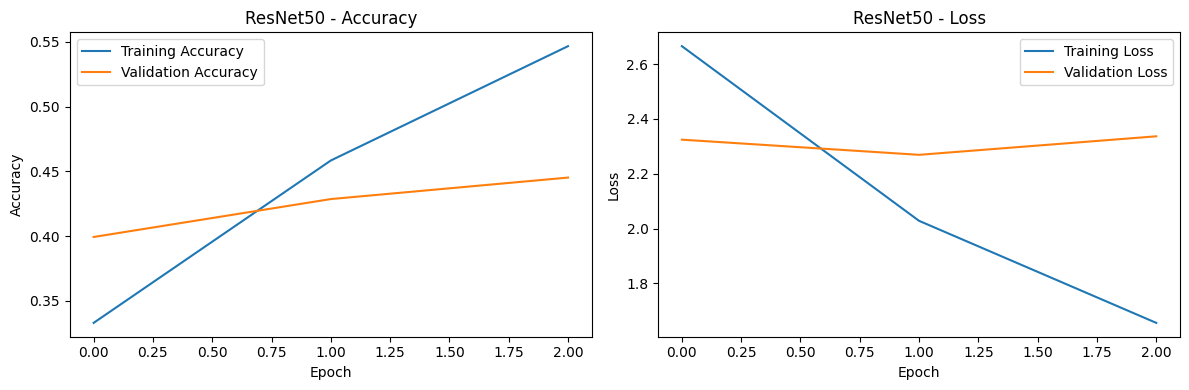

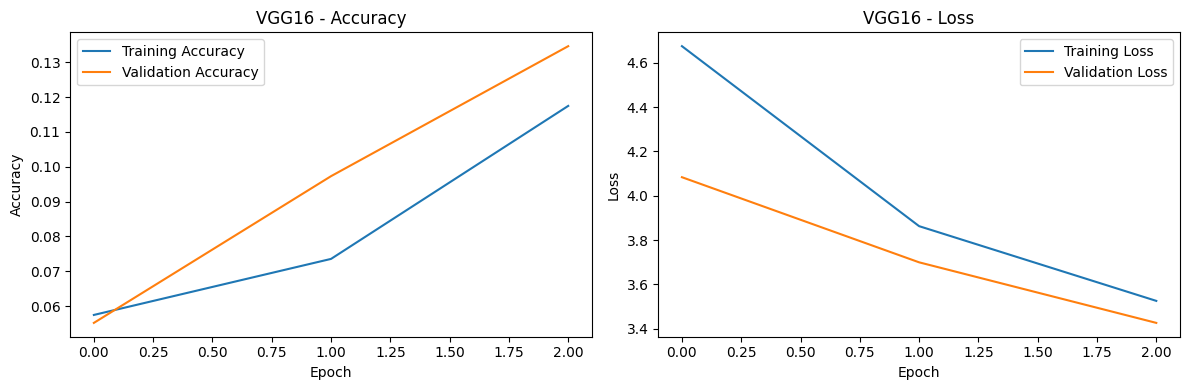

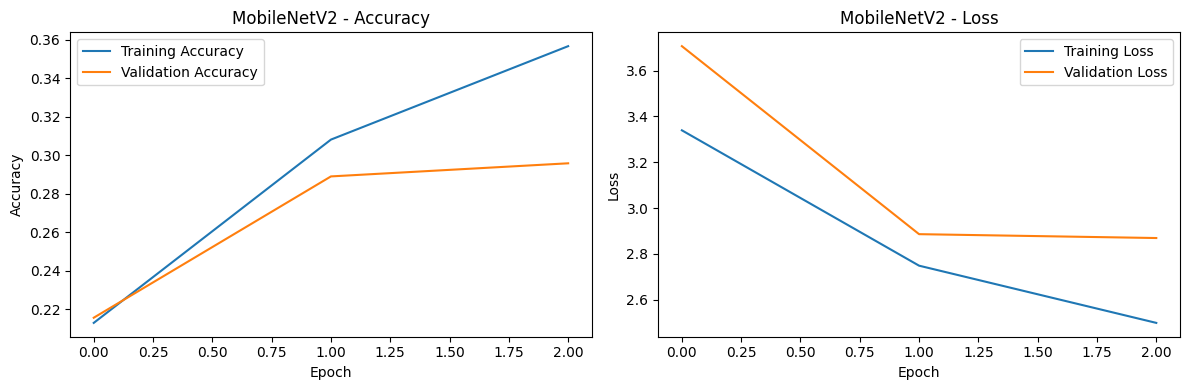

In [19]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

In [20]:
# Save the models
model_resnet50.save('resnet50_cifar100.h5')
model_vgg16.save('vgg16_cifar100.h5')
model_mobilenetv2.save('mobilenetv2_cifar100.h5')

5. Model comparision of both cifar100 and oxfordflower100


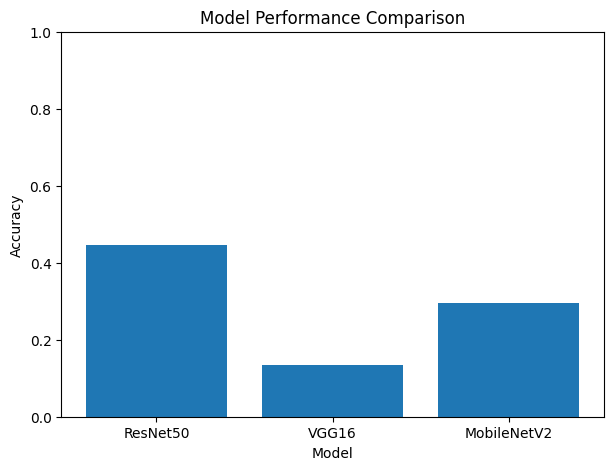

In [25]:
# model performance comparision

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(['ResNet50', 'VGG16', 'MobileNetV2'], [acc_resnet50, acc_vgg16, acc_mobilenetv2])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim([0, 1])
plt.show()


 Model Performance Comparison – Key Takeaways

ResNet50 came out on top, showing the best accuracy among the three models. Its deep residual connections helped it learn complex flower features effectively without running into vanishing gradient problems.

VGG16 struggled the most, achieving the lowest accuracy. This older architecture, while historically important, isn’t well-suited for smaller images like 32×32 and tends to be heavy and slow to train.

MobileNetV2 delivered a balanced performance — not as accurate as ResNet50 but much lighter and faster. It’s a great choice when working with limited hardware or aiming for mobile or embedded applications.

 Overall Summary

ResNet50 proved to be the most powerful model for this flower classification task, while MobileNetV2 provided a good trade-off between accuracy and efficiency. VGG16, though less effective here, still serves as a valuable baseline for comparison.